name - 0.00% missing
rating - 1.00% missing
genre - 0.00% missing
year - 0.00% missing
released - 0.03% missing
score - 0.04% missing
votes - 0.04% missing
director - 0.00% missing
writer - 0.04% missing
star - 0.01% missing
country - 0.04% missing
budget - 28.31% missing
gross - 2.46% missing
company - 0.22% missing
runtime - 0.05% missing


C:\Users\PC\AppData\Local\Temp\ipykernel_21284\23375979.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['rating'] = df['rating'].fillna(method='ffill')


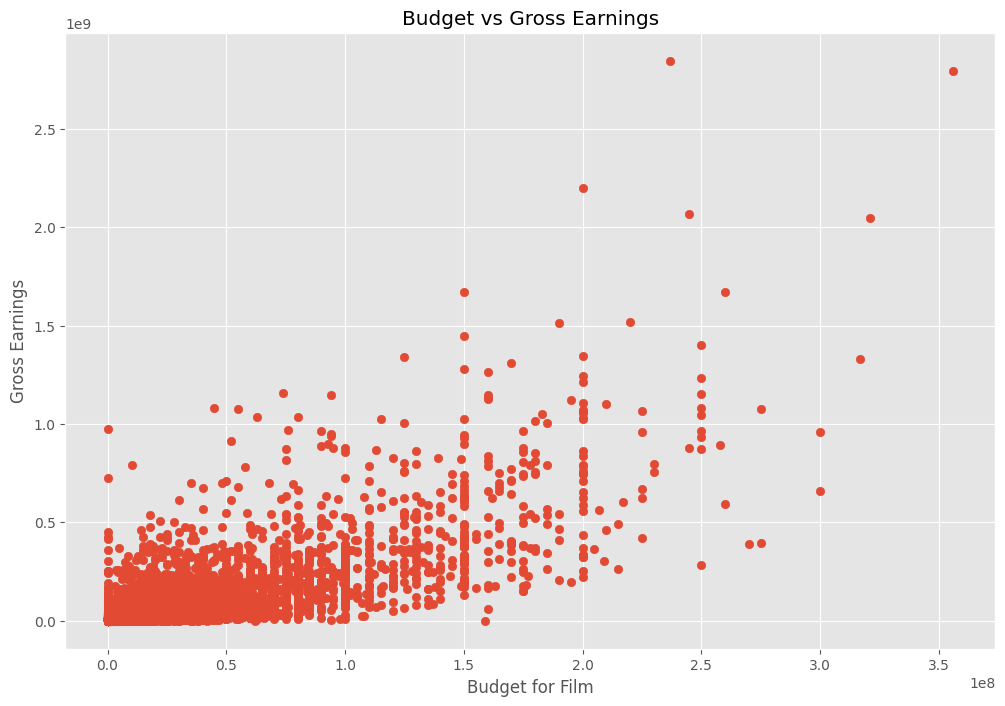

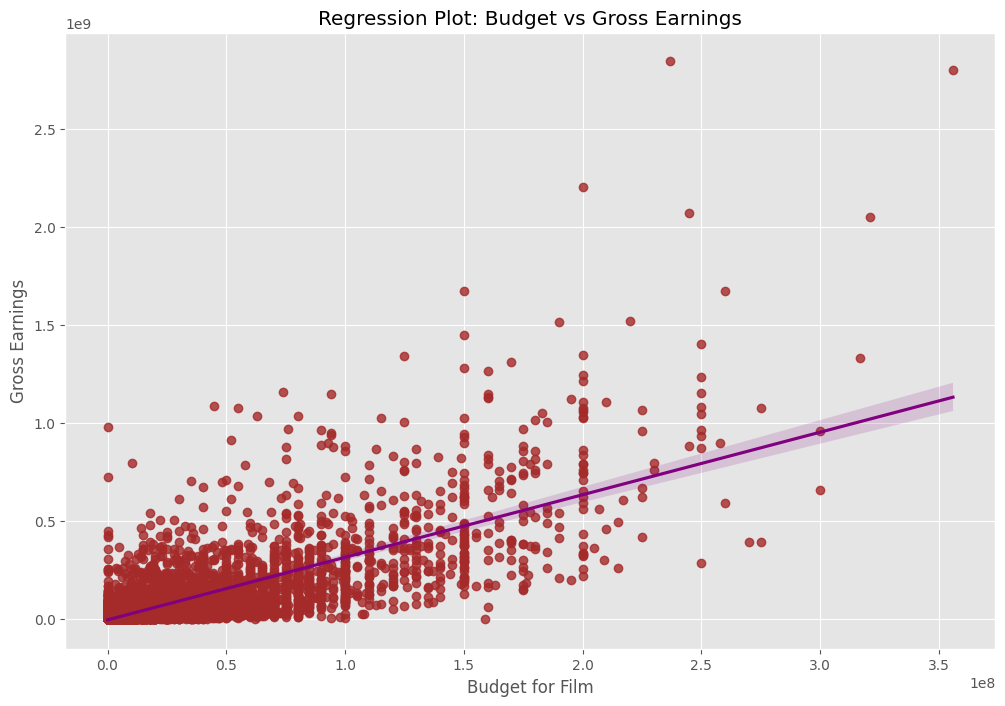

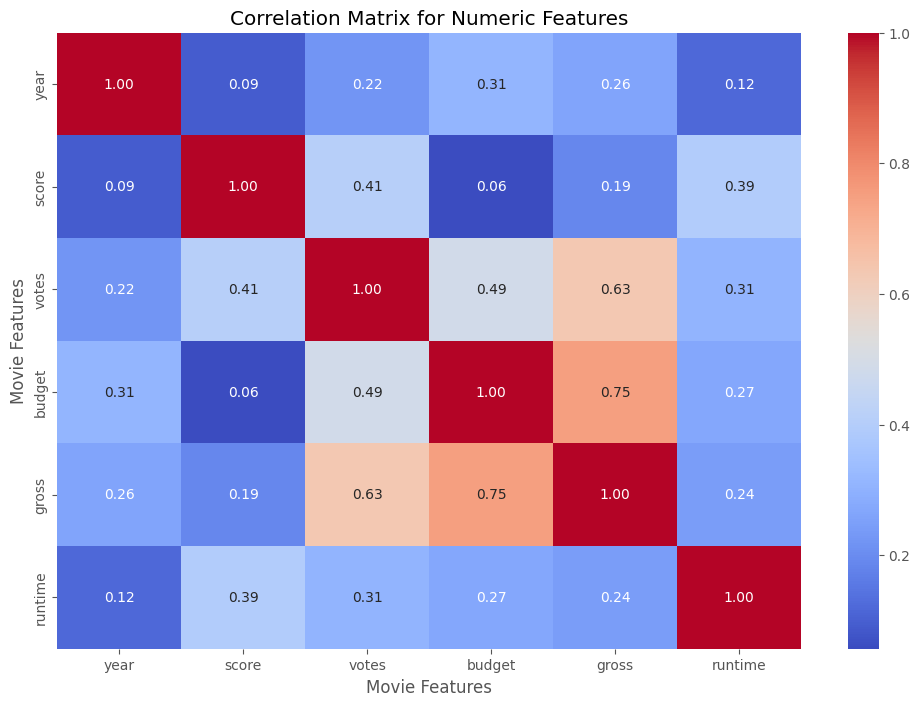

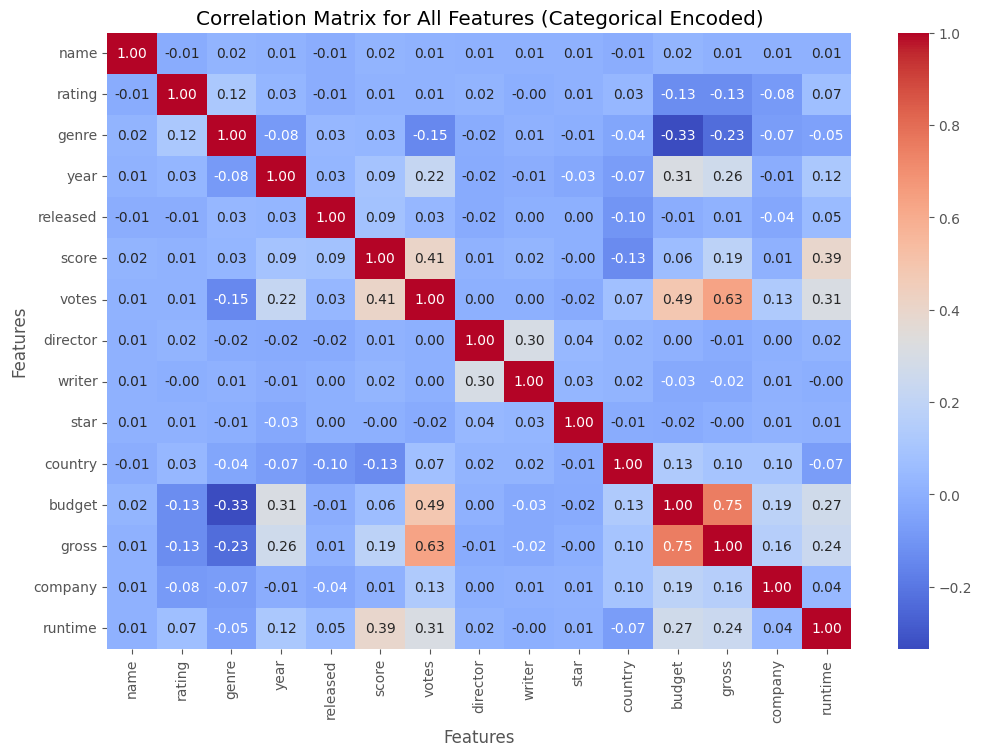

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

def MovieCorrelation():
    # Load the dataset
    df = pd.read_csv(r"C:\Users\PC\OneDrive\Dokumente\tutorial pythonfiles\csv files\movies.csv")
    
    # Check for missing values
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull()) * 100
        print(f'{col} - {pct_missing:.2f}% missing')
    
    # Fill missing values
    df[['budget', 'gross', 'runtime', 'votes', 'score']] = df[['budget', 'gross', 'runtime', 'votes', 'score']].fillna(0)
    df['rating'] = df['rating'].fillna(method='ffill')
    
    # Convert columns to integer type
    df[['budget', 'gross', 'votes']] = df[['budget', 'gross', 'votes']].astype('int64')
    
    # Sort DataFrame by gross earnings
    df_sorted = df.sort_values(by='gross', ascending=False)
    
    # Convert 'released' to datetime
    df['released'] = pd.to_datetime(df['released'])
    
    # Scatter plot of Budget vs Gross Earnings
    plt.figure()
    plt.scatter(x=df_sorted['budget'], y=df_sorted['gross'])
    plt.title('Budget vs Gross Earnings')
    plt.xlabel('Budget for Film')
    plt.ylabel('Gross Earnings')
    plt.show()

    # Regression plot
    plt.figure()
    sns.regplot(x='budget', y='gross', data=df_sorted, scatter_kws={"color": "Brown"}, line_kws={"color": "purple"})
    plt.title('Regression Plot: Budget vs Gross Earnings')
    plt.xlabel('Budget for Film')
    plt.ylabel('Gross Earnings')
    plt.show()

    # Correlation Matrix for Numeric Features
    numeric_df = df_sorted.select_dtypes(include='number')
    correlation_matrix = numeric_df.corr(method='pearson')
    
    plt.figure()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix for Numeric Features')
    plt.xlabel('Movie Features')
    plt.ylabel('Movie Features')
    plt.show()

    # Encode categorical features
    df_encoded = df_sorted.copy()
    for col_name in df_encoded.columns:
        if df_encoded[col_name].dtype == 'object':
            df_encoded[col_name] = df_encoded[col_name].astype('category').cat.codes

    # Correlation Matrix for All Features
    correlation_matrix_encoded = df_encoded.corr(method='pearson')
    
    plt.figure()
    sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix for All Features (Categorical Encoded)')
    plt.xlabel('Features')
    plt.ylabel('Features')
    plt.show()

# Call the function to execute the analysis
MovieCorrelation()

In [ ]:
correlation_mat = df1_numerized.corr()

corr_pairs= correlation_mat.unstack()
corr_pairs


sorted_pairs=corr_pairs.sort_values()


high_corr = sorted_pairs[(sorted_pairs)>0.5]

#hypothesis
#votes and budget have the highest correlation to gross earnings
#Company has low correlation